In [1]:
import xarray
import matplotlib.pyplot as plt

from rio_tiler.io.xarray import XarrayReader

### daymet

In [2]:
ds = xarray.open_dataset(
    "https://pangeo.blob.core.windows.net/pangeo-public/daymet-rio-tiler/na-wgs84.zarr/",
    engine="zarr",
    decode_coords="all",
    consolidated=True,
)
ds

<xarray.Dataset>
Dimensions:                  (time: 1, y: 3728, x: 17268)
Coordinates:
    lambert_conformal_conic  int64 ...
  * time                     (time) datetime64[ns] 1980-07-01T12:00:00
  * x                        (x) float64 -180.0 -180.0 -179.9 ... 180.0 180.0
  * y                        (y) float64 83.78 83.76 83.74 ... 6.126 6.105 6.084
Data variables:
    tmax                     (time, y, x) float32 ...
Attributes:
    Conventions:       CF-1.6
    Version_data:      Daymet Data Version 4.0
    Version_software:  Daymet Software Version 4.0
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    source:            Daymet Software Version 4.0
    start_year:        1980

In [3]:
da = ds["tmax"]
da

<xarray.DataArray 'tmax' (time: 1, y: 3728, x: 17268)>
[64375104 values with dtype=float32]
Coordinates:
    lambert_conformal_conic  int64 0
  * time                     (time) datetime64[ns] 1980-07-01T12:00:00
  * x                        (x) float64 -180.0 -180.0 -179.9 ... 180.0 180.0
  * y                        (y) float64 83.78 83.76 83.74 ... 6.126 6.105 6.084
Attributes:
    cell_methods:  area: mean time: maximum within days time: mean over days
    coordinates:   lon lat
    long_name:     annual average of daily maximum temperature
    units:         degrees C

In [4]:
da = ds["tmax"]
with XarrayReader(da) as dst:
    print(dst.info())

bounds=BoundingBox(left=-179.99998449579846, bottom=6.073484821356791, right=179.98170598363066, top=83.79467217916716) minzoom=1 maxzoom=6 band_metadata=[('b1', {'long_name': '24-hour day based on local time', 'standard_name': 'time'})] band_descriptions=[('b1', '1980-07-01T12:00:00.000000000')] dtype='float32' nodata_type='Nodata' colorinterp=None scale=None offset=None colormap=None count=1 width=17268 attrs={'cell_methods': 'area: mean time: maximum within days time: mean over days', 'coordinates': 'lon lat', 'long_name': 'annual average of daily maximum temperature', 'units': 'degrees C'} name='tmax' height=3728


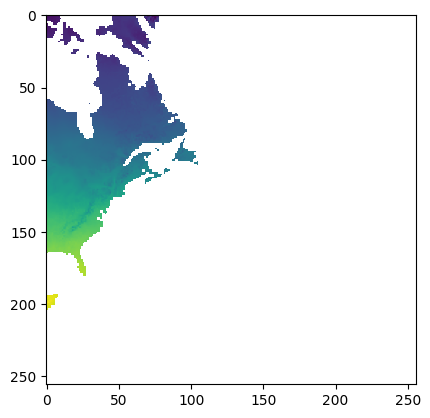

In [5]:
with XarrayReader(da) as dst:
    img = dst.tile(1, 1, 2)

plt.imshow(img.data_as_image());

### noaa-coastwatch-geopolar-sst

bounds=BoundingBox(left=-180.00000610436345, bottom=-89.99999847369712, right=180.00000610436345, top=89.99999847369712) minzoom=0 maxzoom=2 band_metadata=[('b1', {'axis': 'T', 'comment': 'Nominal time of Level 4 analysis', 'long_name': 'reference time of sst field', 'standard_name': 'time'})] band_descriptions=[('b1', '2002-09-01T12:00:00.000000000')] dtype='float32' nodata_type='Nodata' colorinterp=None scale=None offset=None colormap=None count=1 width=7200 attrs={'comment': 'Analysed SST for each ocean grid point', 'long_name': 'analysed sea surface temperature', 'reference': 'Fieguth,P.W. et al. "Mapping Mediterranean altimeter data with a multiresolution optimal interpolation algorithm", J. Atmos. Ocean Tech, 15 (2): 535-546, 1998.     Fieguth, P. Multiply-Rooted Multiscale Models for Large-Scale Estimation, IEEE Image Processing, 10(11), 1676-1686, 2001.     Khellah, F., P.W. Fieguth, M.J. Murray and M.R. Allen, "Statistical Processing of Large Image Sequences", IEEE Transaction

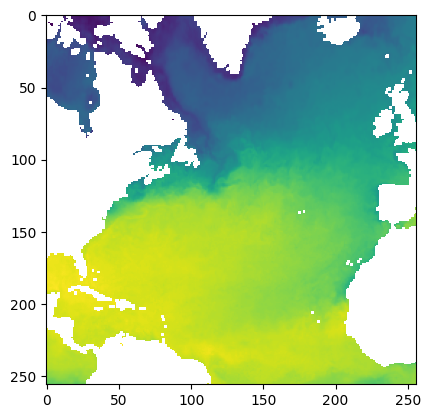

In [6]:
with xarray.open_dataset(
    "https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/noaa-coastwatch-geopolar-sst-feedstock/noaa-coastwatch-geopolar-sst.zarr",
    engine="zarr",
    decode_coords="all"
) as src:
    
    ds = src["analysed_sst"][:1]
    
    # the SST dataset do not have a CRS info
    # so we need to add it to `virtualy` within the Xarray DataArray
    ds.rio.write_crs("epsg:4326", inplace=True)
    
    with XarrayReader(ds) as dst:
        print(dst.info())
        img = dst.tile(1, 1, 2)

    plt.imshow(img.data_as_image())